## Ребров. Домашнее задание к уроку 2


## Задание 1

In [233]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [234]:
# создаю датасет
X, y, coef = datasets.make_regression(n_samples=1000, 
                                      n_features=2, 
                                      n_informative=2, 
                                      n_targets=1,
                                      noise=5, 
                                      bias=0, # intersept=0   
                                      coef=True, 
                                      random_state=42)

In [235]:
print(f'X:\n{X_}\ny:\n{y_}\ncoef: {coef}')

X:
[[-0.16711808  0.14671369]
 [-0.02090159  0.11732738]
 [ 0.15041891  0.364961  ]
 ...
 [ 0.30263547 -0.75427585]
 [ 0.38193545  0.43004165]
 [ 0.07736831 -0.8612842 ]]
y:
[-1.04159903e+01 -6.37726505e+00  1.31541038e+01  1.49359018e+01
 -9.68527219e+00 -3.24630082e+01 -4.09318827e+01 -5.81969492e+01
  2.10433500e+00 -5.39596390e+01  3.77725020e+01 -5.93219519e+01
 -1.92844429e+01 -3.04815914e+01  3.36572421e+01  1.03181877e+01
 -1.06126596e+01 -4.17036642e+01 -1.60670849e+01  8.11457496e+01
  2.32499820e+01 -3.97010031e+01 -3.73422387e+01 -4.75803882e+01
 -5.19321670e+01 -3.71841606e+01  3.11409608e+00  7.13213498e+01
  9.25553337e+01 -1.54220531e+01 -2.73936033e+01 -7.06336302e+00
  1.64845976e+01  2.28104425e+01 -1.13349400e+01 -7.27600084e+00
  4.73389609e+01 -2.90166368e+01  5.08281221e+01 -4.81137434e+01
 -4.48012983e+01 -1.09038022e+01  5.56090359e+01  3.38561096e+01
  5.83104407e+00 -2.93211454e+01  7.69107986e+00  1.57136961e+01
 -9.58436861e+00  2.29242758e+01  6.53663291e+

In [236]:
X = X_.copy()
y = y_.copy()
mse_gd_list = []
mse_sgd_list = []
mse_mbgd_list = []
err = 11111111111111111
err_past = 1

In [237]:
# функция мсе
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [238]:
# Метод градиентного спуска
def eval_GD(X, y, iterations, eta=1e-4):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        w -= eta * (1/n * 2 * np.dot(X.T, (y_pred - y)))
        mse_gd_list.append(err.copy())
        if i % (iterations / 10) == 0:
            print(f'{i}: weights={w}, MSE={err:.3f}')
    return w

In [239]:
%%time
# градиентный спуск
w_gd = eval_GD(X, y, 1000, eta=1e-4)
y_pred_gd = np.dot(X, w_grad)
mse_gd = calc_mse(y, y_pred_gd)

print("градиентный спуск")
print(w_gd, mse_gd)

100: weights=[1.23766997 0.00499459], MSE=1527.567
200: weights=[1.96503256 0.14526152], MSE=1472.677
300: weights=[2.67905132 0.28259879], MSE=1419.792
400: weights=[3.37997109 0.41706745], MSE=1368.839
500: weights=[4.0680322  0.54872726], MSE=1319.748
600: weights=[4.74347058 0.67763672], MSE=1272.450
700: weights=[5.40651783 0.80385315], MSE=1226.880
800: weights=[6.0574013  0.92743266], MSE=1182.974
900: weights=[6.69634416 1.04843019], MSE=1140.672
1000: weights=[7.32356549 1.16689954], MSE=1099.915
градиентный спуск
[7.32356549 1.16689954] 1099.5155102296965
Wall time: 25 ms


In [240]:
# SGD - стохастический градиентный спуск
def eval_SGD(X, y, iterations, eta=1e-4):
    np.random.seed(42)
    w = np.random.randn(X.shape[1]) # начальное приближение весов
    n = X.shape[0] # число наблюдений
    for i in range(1, iterations + 1):
        err = calc_mse(y, np.dot(X, w))
        # генерируем случайный индекс объекта выборки
        ind = np.random.randint(n)
        y_pred = np.dot(X[ind], w)
        w -= eta * (2 * np.dot(X[ind].T, (y_pred - y[ind])))
        mse_sgd_list.append(err.copy())
        if i % (iterations / 10) == 0:
            print(f'{i}: weights={w}, MSE={err:.3f}')
    return w, err

In [241]:
%%time
# стохастический градиентный спуск
w_sgd = eval_SGD(X, y_, 1000, eta=1e-4)
y_pred_sgd = np.dot(X, w_grad)
mse_sgd = calc_mse(y, y_pred_sgd)
print("стохастический градиентный спуск")
print(w_sgd, mse_sgd)

100: weights=[1.04408905 0.02755963], MSE=1541.172
200: weights=[1.92581518 0.32230444], MSE=1474.024
300: weights=[2.56665969 0.50678814], MSE=1424.360
400: weights=[3.45923961 0.72250004], MSE=1359.336
500: weights=[4.2973403  0.87620547], MSE=1299.553
600: weights=[4.9786201  0.97121408], MSE=1252.707
700: weights=[5.63826497 1.09847818], MSE=1209.279
800: weights=[6.27791029 1.21778268], MSE=1166.011
900: weights=[6.9546231  1.33869508], MSE=1121.068
1000: weights=[7.40758474 1.50409189], MSE=1090.688
стохастический градиентный спуск
(array([7.40758474, 1.50409189]), 1090.6880192538463) 1099.5155102296965
Wall time: 29 ms


In [242]:
# mini-batch градиентный спуск
def eval_mbGD(X, y, iterations, batch=3, eta=1e-4):
    np.random.seed(42)
    w = np.random.randn(X.shape[1]) # начальное приближение весов
    n = X.shape[0] # число наблюдений
    n_batch = n // batch # число батчей
    if n % batch != 0:
        n_batch += 1
    print('Количество батчей - ', n_batch)
    for i in range(1, iterations + 1):
        err = calc_mse(y, np.dot(X, w))
        for b in range(n_batch):
            start_ = batch * b
            end_ = batch * (b + 1)
            X_batch = X[start_ : end_, :]
            y_batch = y[start_ : end_]
            y_pred = np.dot(X_batch, w)
            w -= eta * (2/len(y_batch) * np.dot(X_batch.T, (y_pred - y_batch)))
            mse_mbgd_list.append(err.copy())
        if i % (iterations / 10) == 0:
            print(f'{i}: weights={w}, MSE={err:.3f}')
    return w, err

In [243]:
%%time
# mini-batch градиентный спуск
w_mbgd = eval_mbGD(X, y_, 1000, batch=10, eta=1e-4)
y_pred_mbgd = np.dot(X, w_grad)
mse_mbgd = calc_mse(y, y_pred_mbgd)
print("mini-batch градиентный спуск")
print(w_mbgd, mse_mbgd)

Количество батчей -  100
100: weights=[34.54609735  5.88252145], MSE=63.609
200: weights=[39.89291727  6.60348031], MSE=25.179
300: weights=[40.73281499  6.68822247], MSE=24.238
400: weights=[40.86478463  6.69791851], MSE=24.214
500: weights=[40.88552498  6.69898302], MSE=24.214
600: weights=[40.88878511  6.69909206], MSE=24.214
700: weights=[40.88929763  6.69910181], MSE=24.214
800: weights=[40.88937821  6.69910241], MSE=24.214
900: weights=[40.88939089  6.69910238], MSE=24.214
1000: weights=[40.88939288  6.69910236], MSE=24.214
mini-batch градиентный спуск
(array([40.88939288,  6.69910236]), 24.213656189343485) 1099.5155102296965
Wall time: 707 ms


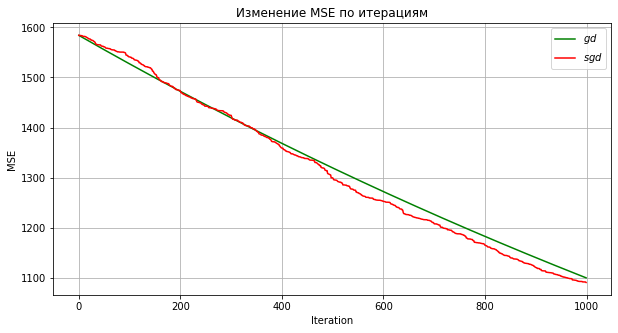

In [244]:
# Визуализация
plt.figure(figsize=(10, 5))
plt.plot(range(len(mse_gd_list)), mse_gd_list, color='g', label=r'$gd$')
plt.plot(range(len(mse_sgd_list)), mse_sgd_list, color='r', label=r'$sgd$')
# plt.plot(range(len(mse_mbgd_list)), mse_mbgd_list, color='b', label=r'$mbgd$')
plt.title('Изменение MSE по итерациям')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.grid()
plt.legend()

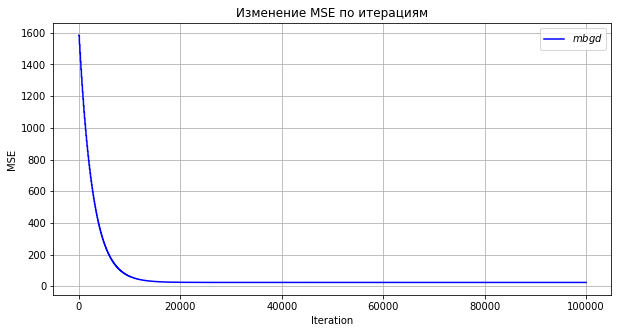

In [245]:
# мне не удалось на одном графике нарисовать все три способа. Думаю, это из-за разного масштаба, но не знаю как объединить.
# поэтому мини-батч метод нарисовал на отдельном графике
plt.figure(figsize=(10, 5))
plt.plot(range(len(mse_mbgd_list)), mse_mbgd_list, color='b', label=r'$mbgd$')
plt.title('Изменение MSE по итерациям')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.grid()
plt.legend()

Вывод:
Честно говоря, я не могу ни из графика, ни из скорости выполнения ячейки, ни из значений ошибки сделать вывод, который написан в википедии, кроме очевидной разницы в затрачиваемых ресурсах. Здесь я вижу, что и градиентный, и стохастический градиентный спуски сходятся примерно одинаково по итерациям. Либо я где-то ошибся, либо я что-то не понял. А мини-батч сходится существенно быстрее предыдущих двух итерациям, но не по времени.